In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [19]:
# Load the dataset
df = pd.read_csv("energy_production.csv")

# Display first 5 rows
df.head()


Timestamp Region Source  EnergyProduced(kWh)  Temperature  \
0  2024-01-01 06:00:00  South  Solar              1147.70         30.0   
1  2024-01-01 12:00:00   West  Hydro              1029.48         26.9   
2  2024-01-01 18:00:00  North  Solar              1718.07         31.5   
3  2024-01-02 00:00:00  North  Solar              1373.14         39.1   
4  2024-01-02 06:00:00  South   Wind              1525.79         25.9   

   WindSpeed  
0        7.7  
1        4.2  
2        2.8  
3        6.5  
4       15.8

In [20]:
print("Original shape:", df.shape)

# Drop missing or invalid values
df = df.dropna()

# Remove any zero or negative energy records
df = df[df['EnergyProduced(kWh)'] > 0]

# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

print("Cleaned shape:", df.shape)
df.info()


Original shape: (100, 6)
Cleaned shape: (100, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            100 non-null    datetime64[ns]
 1   Region               100 non-null    object        
 2   Source               100 non-null    object        
 3   EnergyProduced(kWh)  100 non-null    float64       
 4   Temperature          100 non-null    float64       
 5   WindSpeed            100 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 4.8+ KB


In [21]:
print("\n--- Basic Statistics ---")
print(df.describe())

print("\n--- Total Energy by Source ---")
print(df.groupby('Source')['EnergyProduced(kWh)'].sum())

print("\n--- Average Energy by Region ---")
print(df.groupby('Region')['EnergyProduced(kWh)'].mean())



--- Basic Statistics ---
                           Timestamp  EnergyProduced(kWh)  Temperature  \
count                            100           100.000000    100.00000   
mean   2024-01-13 15:00:00.000000256          1500.198800     28.10200   
min              2024-01-01 06:00:00           834.480000     18.30000   
25%              2024-01-07 10:30:00          1155.650000     23.65000   
50%              2024-01-13 15:00:00          1453.875000     26.85000   
75%              2024-01-19 19:30:00          1800.485000     33.15000   
max              2024-01-26 00:00:00          2479.180000     39.90000   
std                              NaN           419.081445      5.82915   

        WindSpeed  
count  100.000000  
mean     6.248000  
min      0.100000  
25%      2.300000  
50%      4.400000  
75%      7.800000  
max     19.500000  
std      5.000252  

--- Total Energy by Source ---
Source
Hydro    52870.65
Solar    65144.12
Wind     32005.11
Name: EnergyProduced(kWh), dtype: 

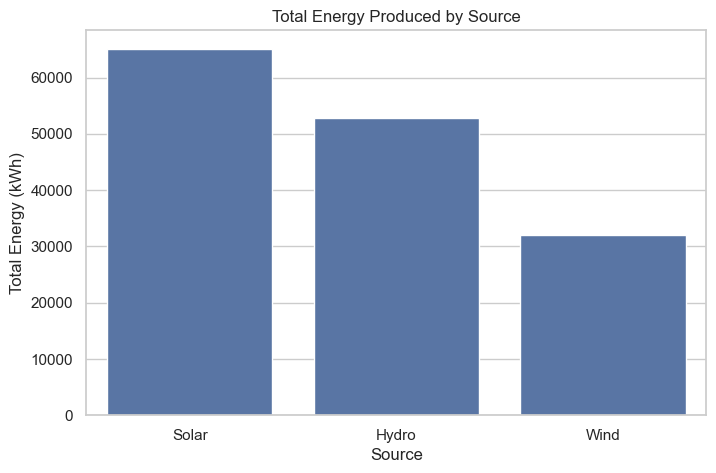

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='Source', y='EnergyProduced(kWh)', data=df, estimator=sum, errorbar=None)
plt.title('Total Energy Produced by Source')
plt.ylabel('Total Energy (kWh)')
plt.show()

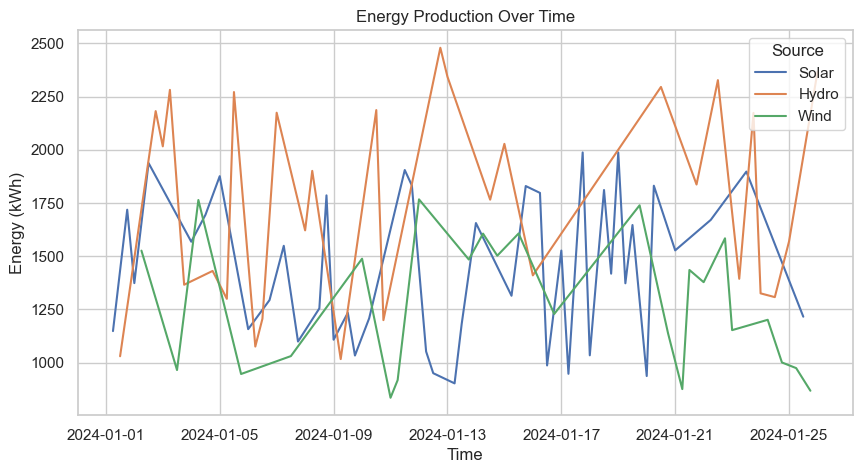

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Timestamp', y='EnergyProduced(kWh)', hue='Source', data=df)
plt.title('Energy Production Over Time')
plt.ylabel('Energy (kWh)')
plt.xlabel('Time')
plt.show()


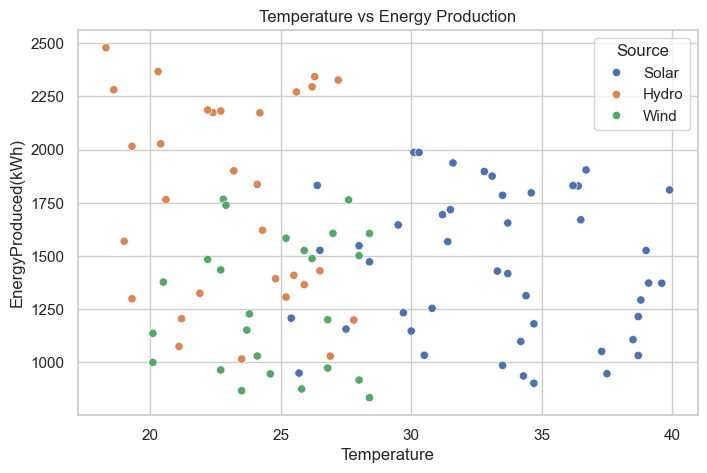

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature', y='EnergyProduced(kWh)', hue='Source', data=df)
plt.title('Temperature vs Energy Production')
plt.show()


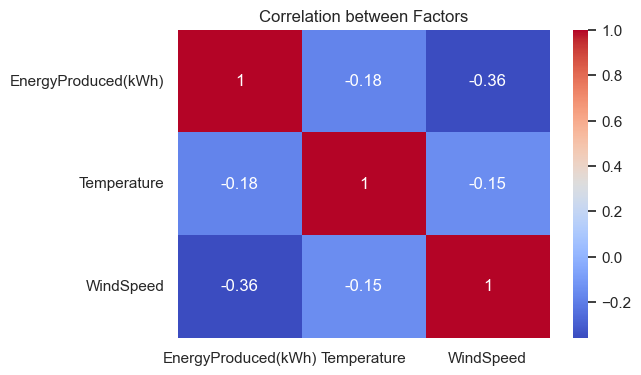

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['EnergyProduced(kWh)','Temperature','WindSpeed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Factors')
plt.show()
